In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.image as mpimg

In [3]:
df=pd.read_csv(r'C:\Users\saurabh\Documents\Desktop\Data Science projects\Data For Projects\States in India with Latitude and Longitude.csv')
df['States']=df['States'].str.replace(r"\(.*\)","").str.rstrip()
df.set_index('States',inplace=True)
df

,Latitude,Longitude
States,,
Andaman And Nicobar,11.667026,92.735983
Andhra Pradesh,14.750429,78.570026
Arunachal Pradesh,27.100399,93.616601
Assam,26.749981,94.216667
Bihar,25.785414,87.479973
Chandigarh,30.719997,76.780006
Chhattisgarh,22.090420,82.159987
Dadra And Nagar Haveli,20.266578,73.016618
Delhi,28.669993,77.230004


In [4]:
state=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')
state=state[['State','Confirmed']]
state.set_index('State',inplace=True)
state

,Confirmed
State,
Total,17643310
Maharashtra,4343727
Kerala,1427546
Karnataka,1368945
Andhra Pradesh,1043441
Tamil Nadu,1097672
Delhi,1047916
Uttar Pradesh,1120176
West Bengal,759942


In [5]:
State_Loc=pd.merge(state,df,how='inner',left_index=True,right_index=True)
State_Loc

,Confirmed,Latitude,Longitude
Maharashtra,4343727,19.250232,73.160175
Kerala,1427546,8.900373,76.569993
Karnataka,1368945,12.570381,76.919997
Andhra Pradesh,1043441,14.750429,78.570026
Tamil Nadu,1097672,12.920386,79.150042
Delhi,1047916,28.669993,77.230004
Uttar Pradesh,1120176,27.599981,78.050006
West Bengal,759942,22.580390,88.329947
Rajasthan,530875,26.449999,74.639981
Chhattisgarh,667446,22.090420,82.159987


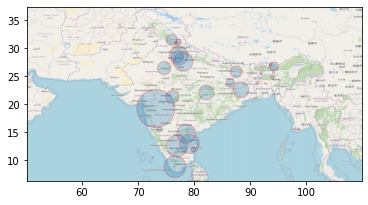

In [6]:
img=mpimg.imread(r'C:\Users\saurabh\Documents\Desktop\Data Science projects\Data For Projects\map[50.186,109.863,6.359,37.405].png')
plt.imshow(img,extent=[50.186,109.863,6.359,37.405],aspect=True)
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250
plt.scatter(State_Loc.Longitude,State_Loc.Latitude,s=State_Loc.Confirmed/3000,alpha=0.25,edgecolor='red')
plt.savefig('testfig')

In [7]:
import pandas as pd
import mplleaflet
import ipywidgets
# import geopandas

import warnings
warnings.filterwarnings('ignore')
fig1,ax1 = plt.subplots(figsize=(12,9))
ax1.scatter(State_Loc.Longitude,State_Loc.Latitude,s=State_Loc.Confirmed/3000,alpha=0.25,edgecolor='red')
mplleaflet.display(fig=fig1)